# Exploring Hist

In [1]:
# Make the necessary imports
from hist import Hist
import hist
import numpy as np
import matplotlib.pyplot as plt

# Make a random number generator
rng = np.random.default_rng()

Let's make a 1d dataset to run on.

In [2]:
data1 = rng.normal(3.5, 2.5, size=1_000_000)

This is a random, gaussian dataset. If you wanted to visualize it, you would probably would _NOT_ do this (plotting only the first 1,000 points just to keep SVG/PDF backends from bogging down):

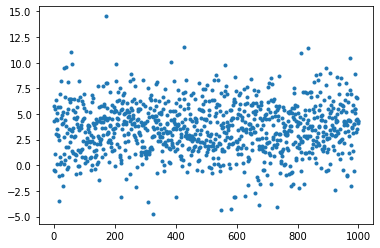

In [3]:
plt.plot(data1[:1_000], '.');

Instead, we would want to look at this data using a histogram. Let's start with the basics. We will create a basic histogram and then perform some operations on it.

_Remember that the histogram here is an object, which is really helpful for a lot of things! :)_

## The histogram object

Now, let's see what a Histogram object looks like.

In [4]:
h = hist.Hist(hist.axis.Regular(300, -5, 10, name="x"))
h.fill(data1)

Hist(Regular(300, -5, 10, name='x', label='x'), storage=Double()) # Sum: 994910.0 (1000000.0 with flow)

There is something to notice here; the fill method mutates the histogram object (it does return itself, so you can chain this functional style if you want). This means that you can fill the histogram multiple times!

We also get the histogram information in a repr! 

You can slice it:

In [5]:
h[20:40]

Hist(Regular(20, -4, -3, name='x', label='x'), storage=Double()) # Sum: 3417.0 (1000000.0 with flow)

Notice how the bin information is propogated with the histogram.


If you want to slice in data coordinates, just use data coordinates and add a "j" suffix. The same slice as above:

In [6]:
h[-4j:-3j]

Hist(Regular(20, -4, -3, name='x', label='x'), storage=Double()) # Sum: 3417.0 (1000000.0 with flow)

You can even mix location and bin number access. You can also rebin by placing a `j` suffixed number in the final slice slot, which we call the "action". This looks quite a bit like a step, but instead of every Nth bins, you are merging N adjacent bins.

In [7]:
h[::10j]

Hist(Regular(30, -5, 10, name='x', label='x'), storage=Double()) # Sum: 994910.0 (1000000.0 with flow)

Let's look at some information about the histogram. First, how about the sum?

In [8]:
h.sum()

994910.0

That's not the total number of entries we put in. Why not?

---
<details><summary>Click to show answer</summary>

Answer: they were outside the range of the Axis. Some of them were too large, some were too low. There are special (and optional) bins for these two cases, called the underflow and the overflow. We can include them in the sum:
    
```python
h.sum(flow=True)
```
    
Later these will enable some powerful things like lossless projections. Most of the time, you can ignore they are there.
    
</details>

In [9]:
# enter the answer here

## Properties

There are some fantastic properties of Histograms that make analysis simple and easy. Let's look at axis breifly, using a rebinned histogram to keep the display short and sweet:

In [10]:
hs = h[::30j]

In [11]:
hs.axes[0].centers

array([-4.25, -2.75, -1.25,  0.25,  1.75,  3.25,  4.75,  6.25,  7.75,
        9.25])

In [12]:
hs.axes[0].edges

array([-5. , -3.5, -2. , -0.5,  1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. ])

In [13]:
hs.axes[0].widths

array([1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5])

In [14]:
hs.axes[0].name

'x'

The PlottableHistogram Protocol has severl useful methods:

In [15]:
hs.values()

array([  2216.,  11504.,  41055., 103744., 185764., 234867., 209361.,
       130510.,  57735.,  18154.])

In [16]:
hs.variances()  # may be None for an unweighted histogram, depending on the fill

array([  2216.,  11504.,  41055., 103744., 185764., 234867., 209361.,
       130510.,  57735.,  18154.])

In [17]:
hs.counts()  # more interesting later

array([  2216.,  11504.,  41055., 103744., 185764., 234867., 209361.,
       130510.,  57735.,  18154.])

And, of course, we can directly look at the underlying memory, which is pretty simple in this case:

In [18]:
hs.view()

array([  2216.,  11504.,  41055., 103744., 185764., 234867., 209361.,
       130510.,  57735.,  18154.])

## Multiple ways to define

### Standard method:

In [19]:
# fill the axes
h = Hist(
    hist.axis.Regular(
        50, -5, 5, name="S", label="s [units]", underflow=False, overflow=False
    ),
    hist.axis.Regular(
        50, -5, 5, name="W", label="w [units]", underflow=False, overflow=False
    ),
)

### Shortcut method:

In [20]:
# add the axes, finalize with storage
h = (
    Hist.new.Reg(50, -5, 5, name="S", label="s [units]", flow=False)
    .Reg(50, -5, 5, name="W", label="w [units]", flow=False)
    .Double()
)